__Title:__ Capstone Project: All Methods

__Authors:__ Will Butler, Robert (Reuven) Derner 

In [ ]:
# Import data from github (next phase)
# url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv'
# data = pd.read_csv(url, encoding = "utf-8")

In [ ]:
# Create a DataFrame from the data
#df = pd.read_csv(file_path, encoding = "utf-8")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [ ]:
#file_path = 'C:\\Users\\19405\\Downloads\\final_project(5).csv'
#df = pd.read_csv(file_path)

In [1]:
import pandas as pd
import requests
from io import BytesIO

In [2]:
# Import data from github (next phase)
url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_6120_Capstone_ARW/will/test_output.csv'
df = pd.read_csv(url, encoding = "utf-8")

df.head()

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,01/01/07,314608.6399,00:00:00,01/01/07 00:00:00 Coal
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,01/01/07,314608.6399,00:15:00,01/01/07 00:15:00 Coal
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,01/01/07,314608.6399,00:30:00,01/01/07 00:30:00 Coal
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.700590,Coal,01/01/07,314608.6399,00:45:00,01/01/07 00:45:00 Coal
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,01/01/07,314608.6399,01:00:00,01/01/07 01:00:00 Coal


In [3]:
# Specify the path to your Excel file
excel_file_path = 'C:/Users/19405/Downloads/Capstone_Weather_Data_Long_Format.xlsx'

# Specify the sheet name
sheet_name = 'Combined'

# Use pandas to read the Excel file and create a DataFrame from a specific sheet
df_weather = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Display the DataFrame
df_weather.head()

,Date,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,Dew Point Avg Dallas North Central,Dew Point Min Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,2007-01-01,2007,1,1,52.0,41.3,34,29,27.0,25,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
1,2007-01-02,2007,1,2,53.0,42.9,35,31,26.8,24,...,85,65.5,45,9,6.7,5,27.3,27.3,27.2,0.0
2,2007-01-03,2007,1,3,53.0,45.4,36,45,33.8,0,...,100,85.7,70,20,7.2,0,27.2,27.1,27.0,0.0
3,2007-01-04,2007,1,4,53.0,48.7,46,48,45.6,44,...,100,77.8,19,22,10.1,0,27.0,26.9,26.6,0.0
4,2007-01-05,2007,1,5,61.0,52.1,48,50,47.6,44,...,79,46.6,17,28,12.9,0,26.9,26.8,26.7,0.0


In [4]:
#### Combine the data

# Conver the date fields to a common format
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format = '%m/%d/%y')

In [5]:
# Assuming df is your DataFrame with a date column 'Date'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display the DataFrame to inspect the changes
print(df)

                                              HashedIndex       Demand   Fuel  \
0       f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   Coal   
1       ede6098380c10e48d944288c220849403128f8752402f4...  3368.077206   Coal   
2       be6c8a673a21a9c147a33b75f67679120aa352334e59ba...  3365.003007   Coal   
3       8643933102baf47f748061b6375c2c8f94020317879c88...  3364.700590   Coal   
4       062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...  3337.219223   Coal   
...                                                   ...          ...    ...   
210235  5a9b5f86557c9c72cbc4a1475c82fc44dcbf5e31d8f699...   564.001066    Wnd   
210236  098c0ebffdee4dacd24219f3ebc6da3c8a84b99a6aa2d8...   558.927514    Wnd   
210237  d29254b8ca291cab784ca9e6dcea1795322ff831b0b70a...   540.610137    Wnd   
210238  5dbc840df98147df4cfb3b3221dd8db292603f4880da29...   533.719670    Wnd   
210239  2ee53f5293452a3d0c21fbf5378fa022b154cc18ca82e7...   543.553356    Wnd   

             Date     Daily

In [6]:
# Perform the join on the common date field
merged_df = pd.merge(df, df_weather, on='Date')

# Display the merged DataFrame
merged_df.head(10)

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Year,Month,Day,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.6399,00:15:00,01/01/07 00:15:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,2007-01-01,314608.6399,00:30:00,01/01/07 00:30:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.700590,Coal,2007-01-01,314608.6399,00:45:00,01/01/07 00:45:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,2007-01-01,314608.6399,01:00:00,01/01/07 01:00:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
5,93db4b152121430df2aaf08474827ded51dc11bd9ac017...,3340.401121,Coal,2007-01-01,314608.6399,01:15:00,01/01/07 01:15:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
6,e28bce99fca3d2f0b0be924c7aceb2c6c7a223f7e7537b...,3338.779986,Coal,2007-01-01,314608.6399,01:30:00,01/01/07 01:30:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
7,fa2eec7020d3bd8f622fa6fb3052d3841bfef869f5aa01...,3341.014301,Coal,2007-01-01,314608.6399,01:45:00,01/01/07 01:45:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
8,1d0c60b90133960c9ddfbb738e6ff906de67359712d09c...,3375.998789,Coal,2007-01-01,314608.6399,02:00:00,01/01/07 02:00:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
9,bd9362b3332309859bea7e8028f3b57e64008d2978f374...,3353.998083,Coal,2007-01-01,314608.6399,02:15:00,01/01/07 02:15:00 Coal,2007,1,1,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0


We still likely need to cut demand by the incriments of time for total deamn

### Examine the data

In [8]:
merged_df.shape

(210240, 138)

__Missing Values__  
The dataset contains significant portion of missing values throughout the dataset, we will need to use various methods for imputation of the missing values.

In [9]:
merged_df.isnull().sum()

HashedIndex                             0
Demand                                  0
Fuel                                    0
Date                                    0
Daily MWH                               0
                                       ..
Wind Speed Min Midland Far West         0
Pressures Inch Max Midland Far West     0
Pressure InchAvg Midland Far West       0
Pressure Inch Min Midland Far West      0
Precipitation Total Midland Far West    0
Length: 138, dtype: int64

In [10]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(merged_df[merged_df.columns[merged_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / merged_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent


In [11]:
merged_df.describe()

,Demand,Daily MWH,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,Dew Point Avg Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
count,210240.000000,210240.000000,210240.0,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,...,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.0
mean,1448.500557,139068.078467,2007.0,6.526027,15.720548,75.427397,66.507671,58.493151,57.676712,52.716986,...,84.504110,60.575342,34.268493,18.243836,9.910959,2.498630,27.096438,26.932877,26.525205,0.0
std,1701.485689,155232.773306,0.0,3.447860,8.796268,15.833358,15.486550,16.249231,15.530462,17.221655,...,13.347983,16.047633,17.319575,6.218700,3.542415,3.089206,0.168030,0.650955,3.129981,0.0
min,0.000000,142.748335,2007.0,1.000000,1.000000,31.000000,22.000000,0.000000,19.000000,13.400000,...,28.000000,15.300000,0.000000,7.000000,2.800000,0.000000,26.700000,17.800000,0.000000,0.0
25%,81.131135,9347.068989,2007.0,4.000000,8.000000,67.000000,55.600000,44.000000,46.000000,37.400000,...,80.000000,50.400000,21.000000,14.000000,7.500000,0.000000,27.000000,26.900000,26.800000,0.0
50%,628.393945,60195.135065,2007.0,7.000000,16.000000,79.000000,70.500000,63.000000,63.000000,59.200000,...,89.000000,60.900000,33.000000,17.000000,9.500000,0.000000,27.100000,27.000000,26.900000,0.0
75%,2889.410151,292063.514100,2007.0,10.000000,23.000000,88.000000,79.700000,73.000000,71.000000,68.000000,...,93.000000,70.600000,42.000000,21.000000,12.000000,5.000000,27.200000,27.100000,27.000000,0.0
max,10205.252570,666745.052800,2007.0,12.000000,31.000000,102.000000,92.300000,83.000000,77.000000,73.600000,...,100.000000,95.300000,92.000000,66.000000,25.200000,13.000000,27.600000,27.500000,27.500000,0.0


We can see that many of the fields that should be numeric are not numeric fields 

In [12]:
# List of columns to convert to float
#columns_to_convert = ['Temp Max', 'Temp Avg',
#       'TempMin', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
#       'Humidity Percent Max', 'Humidity Percent Avg', 'Humidity Percent Min',
#       'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
#       'Pressures Inch Max', 'Pressure InchAvg', 'Pressure Inch Min',
#       'Precipitation Total']

# Convert the specified columns to float
#merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)

### Examine any Correlations 

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


C:\Users\19405\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
correlation_matrix = merged_df.corr()

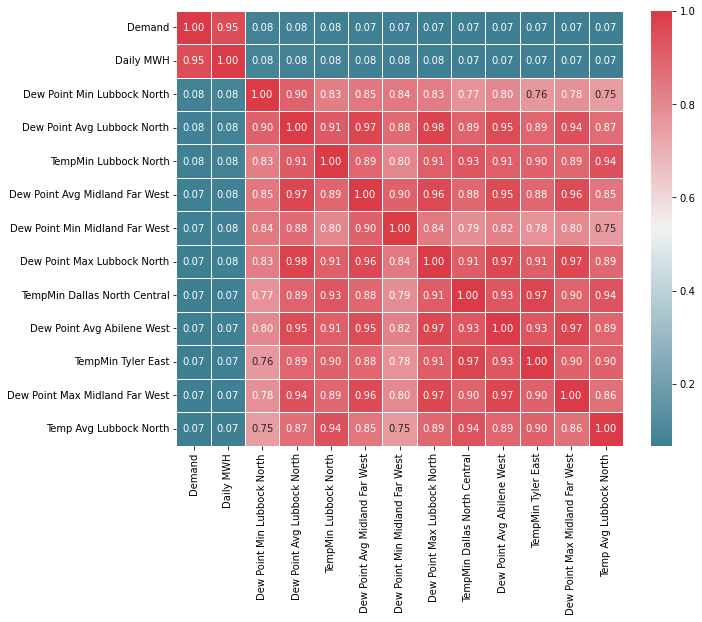

In [15]:
# Select correlations above 0.4 or below -0.4 for the target variable
target_corr = correlation_matrix['Demand']
target_corr = target_corr[(target_corr > 0.068) | (target_corr < -0.068)].sort_values(ascending=False)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros((len(target_corr), len(target_corr)))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Customize the color palette if desired
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap for the selected correlations
sns.heatmap(correlation_matrix.loc[target_corr.index, target_corr.index], 
            annot=True, fmt=".2f", cmap=cmap, mask=mask, linewidths=.5)


plt.show()

There are a number of correlations now that we have refitted the dataframe across vs long, there is a high degree of correlation among the dw point and the temperature data across Texas, however that is a likely scenario.

## EDA Exploratory Data Analysis

In [16]:
#Visualize the distribution of the target variable

#ax = sns.countplot(x='Demand', data=merged_df)
#plt.title('Distribution of Demand Feature')

# Add annotations for the count of each class

#for p in ax.patches:
#    count = p.get_height()
#    ax.annotate(f'{count:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Format y-axis labels with commas

#ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

#plt.show()


In [19]:
#Calculate new demand and MWH fields for the dataframe 

# Combine 'date' and 'Time' into a single datetime column
merged_df['Timestamp'] = pd.to_datetime(merged_df['Date'].astype(str) + ' ' + merged_df['Time'].astype(str))

# Calculate total demand for each day
daily_total_demand = merged_df.groupby('Day')['Demand'].sum()

# Merge the total demand back to the original dataframe
merged_df2 = merged_df.merge(daily_total_demand, left_on='Day', right_index=True, suffixes=('', '_daily'))

# Calculate the demand percentage for each 15-minute interval
merged_df2['demand_percentage'] = merged_df2['Demand'] / merged_df2['Demand_daily']

In [25]:
merged_df2

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Year,Month,Day,...,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West,Timestamp,Demand_daily,demand_percentage
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.63990,00:00:00,01/01/07 00:00:00 Coal,2007,1,1,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:00:00,9.794457e+06,0.000345
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.63990,00:15:00,01/01/07 00:15:00 Coal,2007,1,1,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:15:00,9.794457e+06,0.000344
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,2007-01-01,314608.63990,00:30:00,01/01/07 00:30:00 Coal,2007,1,1,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:30:00,9.794457e+06,0.000344
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.700590,Coal,2007-01-01,314608.63990,00:45:00,01/01/07 00:45:00 Coal,2007,1,1,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:45:00,9.794457e+06,0.000344
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,2007-01-01,314608.63990,01:00:00,01/01/07 01:00:00 Coal,2007,1,1,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 01:00:00,9.794457e+06,0.000341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,5a9b5f86557c9c72cbc4a1475c82fc44dcbf5e31d8f699...,564.001066,Wnd,2007-12-31,49633.40008,22:45:00,12/31/07 22:45:00 Wnd,2007,12,31,...,22,9.3,0,27.4,27.1,26.9,0.0,2007-12-31 22:45:00,5.938050e+06,0.000095
210236,098c0ebffdee4dacd24219f3ebc6da3c8a84b99a6aa2d8...,558.927514,Wnd,2007-12-31,49633.40008,23:00:00,12/31/07 23:00:00 Wnd,2007,12,31,...,22,9.3,0,27.4,27.1,26.9,0.0,2007-12-31 23:00:00,5.938050e+06,0.000094
210237,d29254b8ca291cab784ca9e6dcea1795322ff831b0b70a...,540.610137,Wnd,2007-12-31,49633.40008,23:15:00,12/31/07 23:15:00 Wnd,2007,12,31,...,22,9.3,0,27.4,27.1,26.9,0.0,2007-12-31 23:15:00,5.938050e+06,0.000091
210238,5dbc840df98147df4cfb3b3221dd8db292603f4880da29...,533.719670,Wnd,2007-12-31,49633.40008,23:30:00,12/31/07 23:30:00 Wnd,2007,12,31,...,22,9.3,0,27.4,27.1,26.9,0.0,2007-12-31 23:30:00,5.938050e+06,0.000090


In [ ]:
# Calculate the daily MWH percentage for each 15-minute interval
#merged_df2['MWH_percentage'] = merged_df2['Daily MWH'] / merged_df2['Daily_MWH_daily']

# Now, df contains the demand percentage and MWH percentage for each 15-minute interval

In [28]:
merged_df = merged_df2

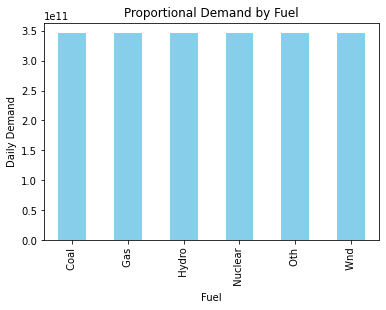

In [29]:
# Plot the bar chart
merged_df.groupby('Fuel')['Demand_daily'].sum().plot(kind='bar', color='skyblue')
plt.title('Proportional Demand by Fuel')
plt.xlabel('Fuel')
plt.ylabel('Daily Demand')
plt.show()

### Univariate Analysis

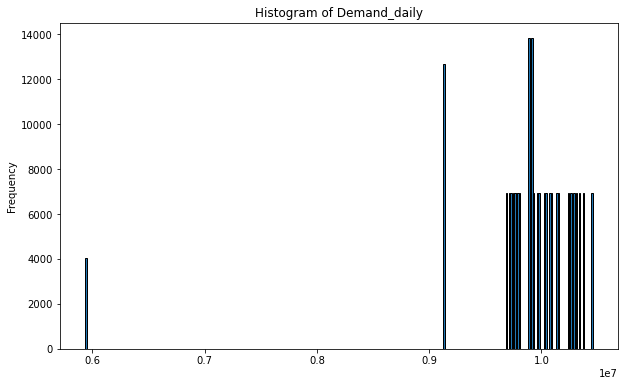

In [30]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Demand_daily'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Demand_daily')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

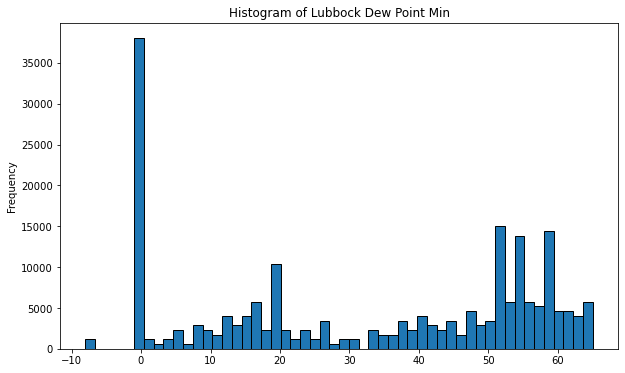

In [32]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Dew Point Min Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Lubbock Dew Point Min')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

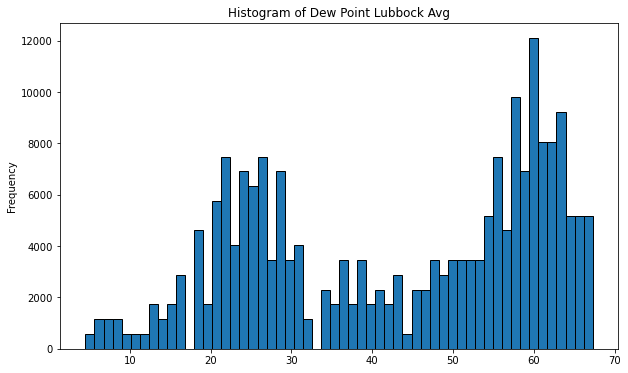

In [33]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Dew Point Avg Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Lubbock Avg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

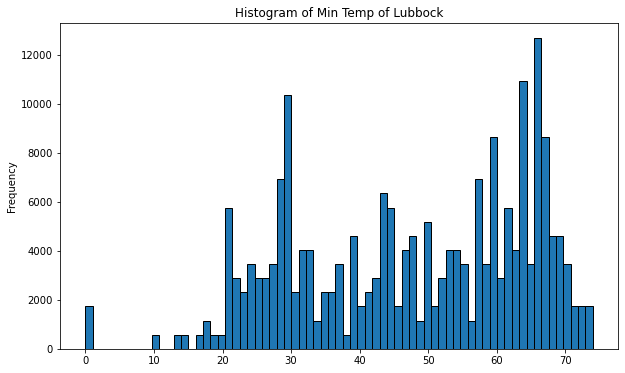

In [34]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['TempMin Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temp of Lubbock TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

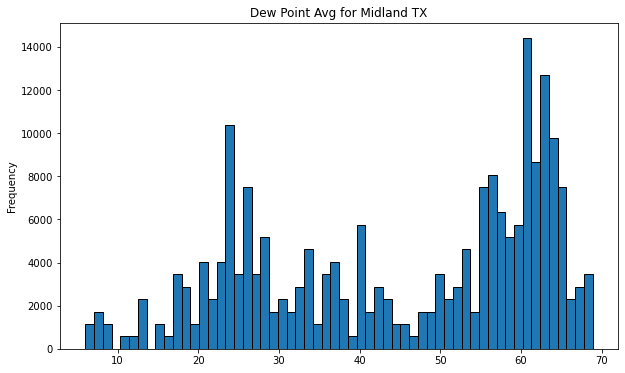

In [35]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Dew Point Avg Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Dew Point Avg for Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

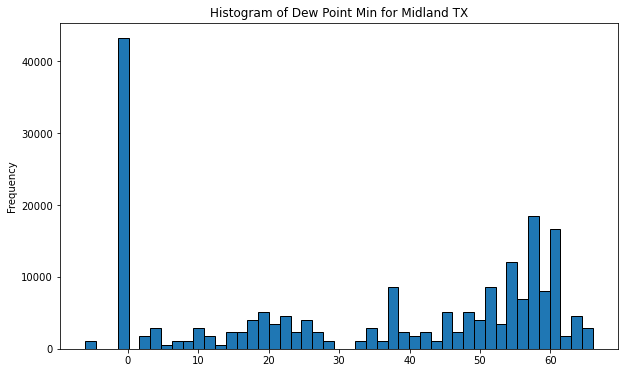

In [36]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Dew Point Min Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Min for Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

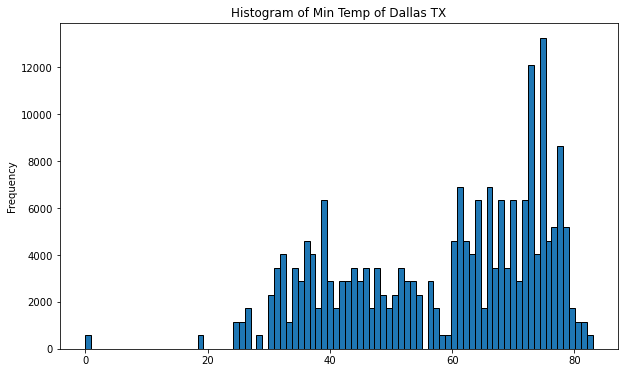

In [37]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['TempMin Dallas North Central'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temp of Dallas TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

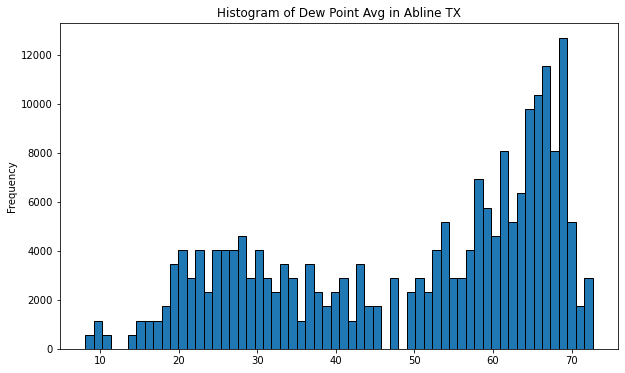

In [39]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Dew Point Avg Abilene West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Avg in Abline TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

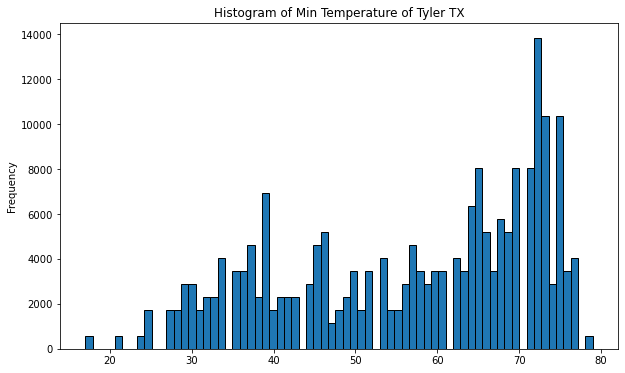

In [40]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['TempMin Tyler East'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temperature of Tyler TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

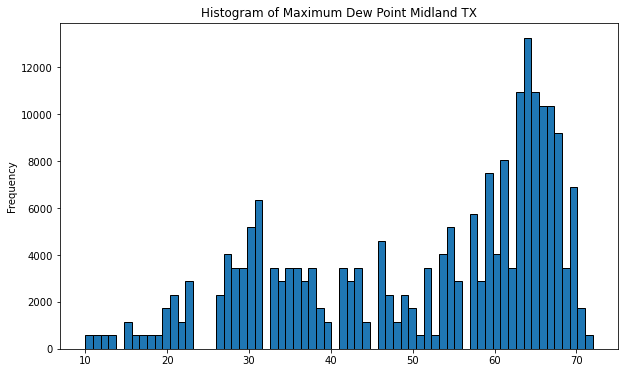

In [41]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Dew Point Max Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Maximum Dew Point Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

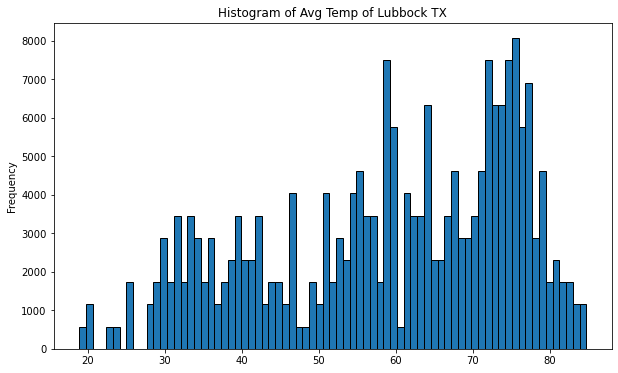

In [42]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Temp Avg Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Avg Temp of Lubbock TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plotting the histogram
#plt.figure(figsize=(10, 6))
#sns.boxplot(df['x0'])  
#plt.title('Box & Whisker Plot of x0')
#plt.xlabel('x0')
#plt.ylabel('Values')
#plt.show()

In [ ]:
# Plot the bar chart
merged_df.groupby('Fuel')['ProportionalDemand'].sum().plot(kind='bar', color='skyblue')
plt.title('Proportional Demand by Fuel')
plt.xlabel('Fuel')
plt.ylabel('Proportional Demand')
plt.show()

x37 and x32 should be handled converted to numerics during imputating any missing data.

### Imputation

In [43]:
# List of categorical columns to one-hot encode
categorical_columns = ['Fuel']#, 'Weather Station', 'ERCOT Region']

# Use pd.get_dummies to create dummy variables
imp_df = pd.get_dummies(merged_df, columns=categorical_columns, prefix=categorical_columns)

imp_df.head()

,HashedIndex,Demand,Date,Daily MWH,Time,Combined,Year,Month,Day,Temp Max Dallas North Central,...,Precipitation Total Midland Far West,Timestamp,Demand_daily,demand_percentage,Fuel_ Coal,Fuel_ Gas,Fuel_ Hydro,Fuel_ Nuclear,Fuel_ Oth,Fuel_ Wnd
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,2007-01-01,314608.6399,00:00:00,01/01/07 00:00:00 Coal,2007,1,1,52.0,...,0.0,2007-01-01 00:00:00,9.794457e+06,0.000345,1,0,0,0,0,0
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,2007-01-01,314608.6399,00:15:00,01/01/07 00:15:00 Coal,2007,1,1,52.0,...,0.0,2007-01-01 00:15:00,9.794457e+06,0.000344,1,0,0,0,0,0
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,2007-01-01,314608.6399,00:30:00,01/01/07 00:30:00 Coal,2007,1,1,52.0,...,0.0,2007-01-01 00:30:00,9.794457e+06,0.000344,1,0,0,0,0,0
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.700590,2007-01-01,314608.6399,00:45:00,01/01/07 00:45:00 Coal,2007,1,1,52.0,...,0.0,2007-01-01 00:45:00,9.794457e+06,0.000344,1,0,0,0,0,0
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,2007-01-01,314608.6399,01:00:00,01/01/07 01:00:00 Coal,2007,1,1,52.0,...,0.0,2007-01-01 01:00:00,9.794457e+06,0.000341,1,0,0,0,0,0


In [44]:
print(imp_df.columns)

Index(['HashedIndex', 'Demand', 'Date', 'Daily MWH', 'Time', 'Combined',
       'Year', 'Month', 'Day', 'Temp Max Dallas North Central',
       ...
       'Precipitation Total Midland Far West', 'Timestamp', 'Demand_daily',
       'demand_percentage', 'Fuel_ Coal', 'Fuel_ Gas', 'Fuel_ Hydro',
       'Fuel_ Nuclear', 'Fuel_ Oth', 'Fuel_ Wnd'],
      dtype='object', length=146)


In [45]:
print(imp_df.dtypes)

HashedIndex              object
Demand                  float64
Date             datetime64[ns]
Daily MWH               float64
Time                     object
                      ...      
Fuel_ Gas                 uint8
Fuel_ Hydro               uint8
Fuel_ Nuclear             uint8
Fuel_ Oth                 uint8
Fuel_ Wnd                 uint8
Length: 146, dtype: object


### Modeling 

#### Linear Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, explained_variance_score


# List of targets to drop
features_to_drop = ['HashedIndex','Combined','Demand','Demand_daily','demand_percentage','Timestamp','Time','Date']

# Split the data into features (X) and target variable (y)
X = imp_df.drop(features_to_drop, axis=1)  # Remove the target variable from features
y = imp_df['Demand_daily']


In [48]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)


In [49]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

Mean Squared Error: 174554389809.91568
Mean Absolute Error: 289190.5402264453
R^2 Score: 0.5600061393302145
Root Mean Squared Error: 417797.06773733546
Explained Variance Score: 0.5600076166243152


Mean Squared Error (MSE):

Interpretation: MSE is the average of the squared differences between the predicted and actual values.
Your MSE: Approximately 174,554,389,809.92.
Implication: The squared nature of MSE means that larger errors contribute disproportionately more. In your case, the model's predictions have some relatively large errors, contributing to the overall MSE.
Mean Absolute Error (MAE):

Interpretation: MAE is the average of the absolute differences between the predicted and actual values.
Your MAE: Approximately 289,190.54.
Implication: MAE is more interpretable as it gives the average magnitude of errors. An MAE of 289,190.54 indicates, on average, your predictions deviate by this amount from the actual values.
R^2 Score (Coefficient of Determination):

Interpretation: R^2 measures the proportion of variance in the dependent variable explained by the independent variables.
Your R^2 Score: Approximately 0.56.
Implication: An R^2 of 0.56 means that your model explains 56% of the variance in the target variable. This suggests a moderate level of explanatory power, but there is room for improvement.
Root Mean Squared Error (RMSE):

Interpretation: RMSE is the square root of MSE and provides a measure of the average magnitude of errors.
Your RMSE: Approximately 417,797.07.
Implication: Like MSE, RMSE is sensitive to larger errors. An RMSE of 417,797.07 indicates the typical size of errors in your predictions.
Explained Variance Score:

Interpretation: This score is another measure of how well the model explains the variance in the target variable.
Your Explained Variance Score: Approximately 0.56.
Implication: Similar to R^2, it confirms that 56% of the variance in the target variable is captured by your model.
In summary, these metrics collectively suggest that your model has some predictive power (as indicated by R^2 and Explained Variance) but also exhibits some errors, especially in terms of the magnitude of predictions (as indicated by MSE, MAE, and RMSE). Further model refinement or feature engineering may help improve these metrics. Always consider the context of your specific problem domain when interpreting these metrics.

#### Time Series Models

#### Neural Network Models